### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


We are going to conduct a 2 tailed t-Test on 2 Independent samples with Numerical Data
We need to check whether the mean of both samples are different and
Is there any significance difference between the two samples?


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
data=pd.read_csv("C:\\Users\\DELL\\Data Science\\Abhishek ExcelR\\Data Science\\Assignments\\Hypothesis Testing\\Cutlets.csv")

In [3]:
data

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [5]:
data.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
data.duplicated().sum()

0

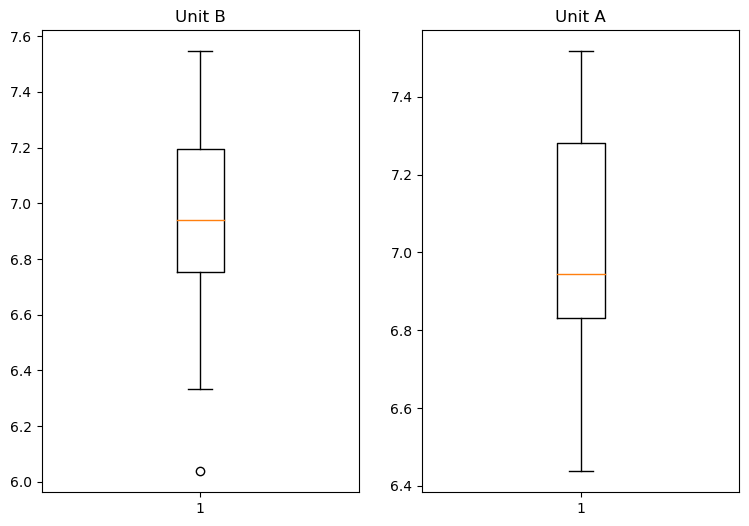

In [7]:
plt.subplots(figsize = (9,6))
plt.subplot(122)
plt.boxplot(data['Unit A'])
plt.title('Unit A')
plt.subplot(121)
plt.boxplot(data['Unit B'])
plt.title('Unit B')
plt.show()

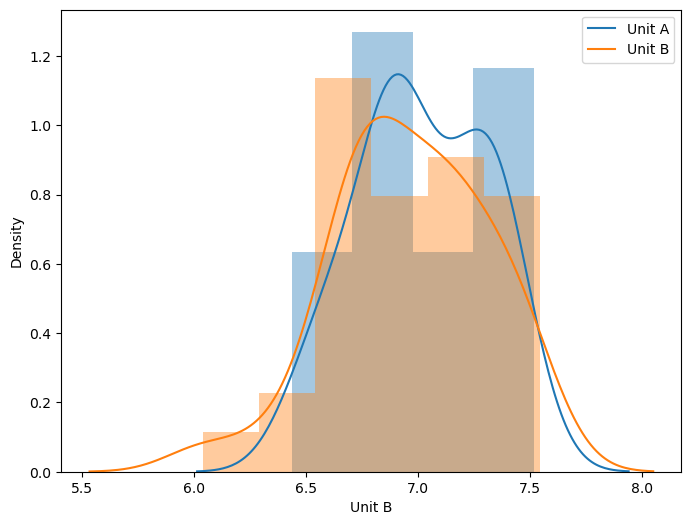

In [8]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sn.distplot(data['Unit A'], kde = True)
sn.distplot(data['Unit B'],hist = True)
plt.legend(labels)

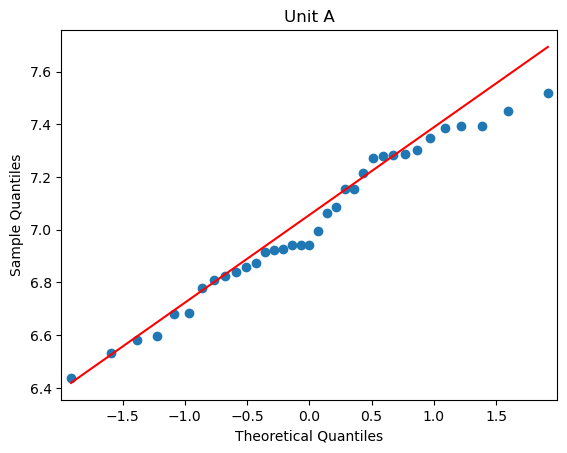

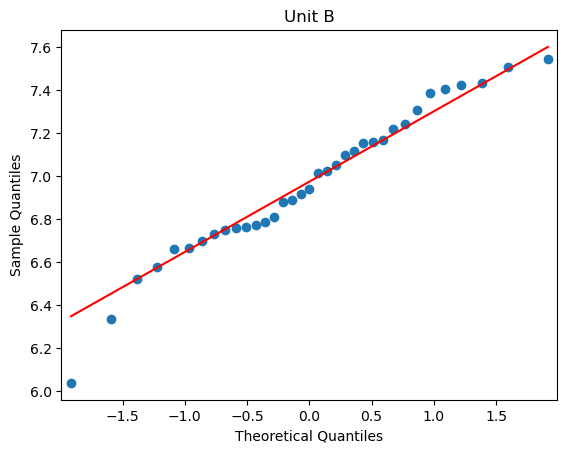

In [9]:
#Plotting Q-Q plot to check whether the distribution follows normal distribution or not
sm.qqplot(data["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(data["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

In [10]:
#Compare Evidences with Hypothesis using t-statistics

statistic , p_value = st.ttest_ind(data['Unit A'],data['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.47223947245995


Compare p_value with 'alpha '(Significane Level)
If p_value is not equal to alpha then  we failed to reject Null Hypothesis because of lack of evidence
If p_value is = ' alpha' we reject Null Hypothesis
interpreting p-value

In [11]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')


Significnace=0.025, p=0.472
We fail to reject Null hypothesis


#### Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples


# Question 2

####    A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
####  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data
We need to check whether the mean of any of these samples are different or the same?

In [12]:
lab=pd.read_csv("C:\\Users\\DELL\\Data Science\\Abhishek ExcelR\\Data Science\\Assignments\\Hypothesis Testing\\LabTAT.csv")

In [13]:
lab

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [14]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [15]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [16]:
lab.duplicated().sum()

0

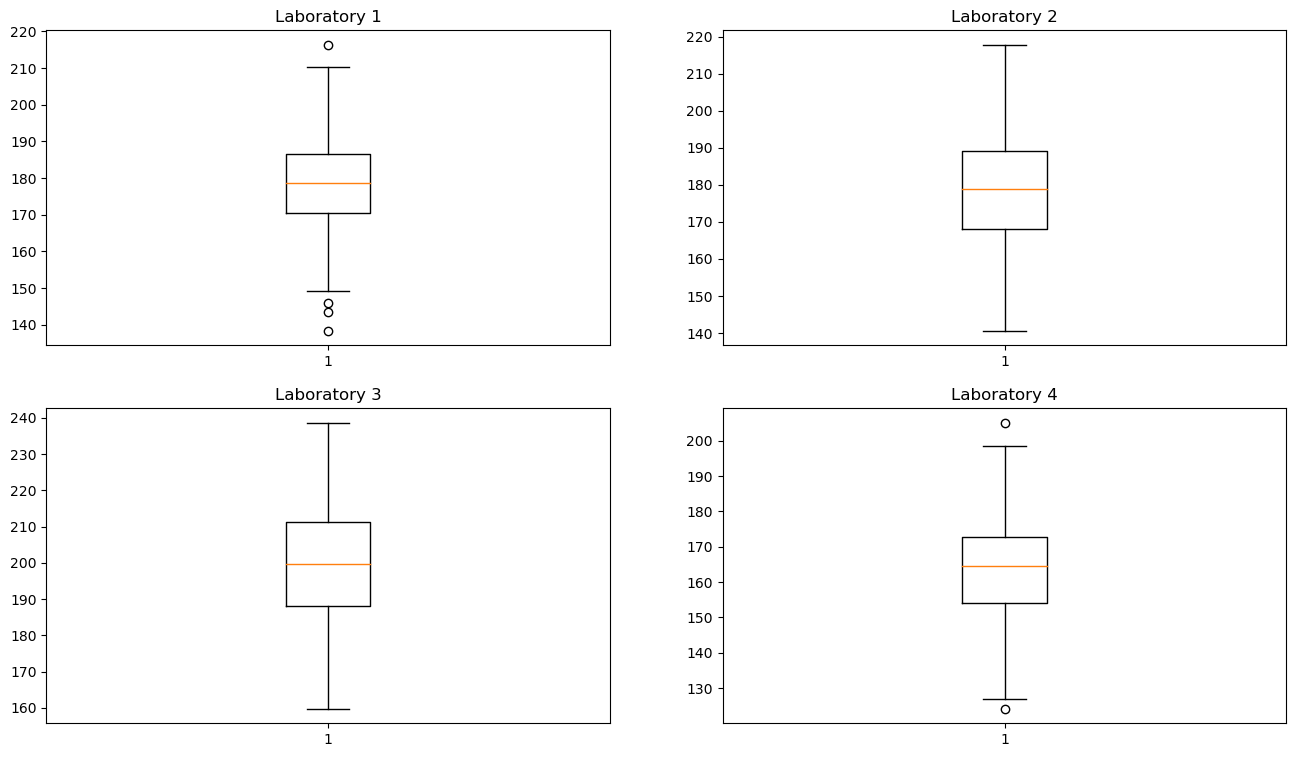

In [17]:
#Ploting data

plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(lab['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(lab['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(lab['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(lab['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

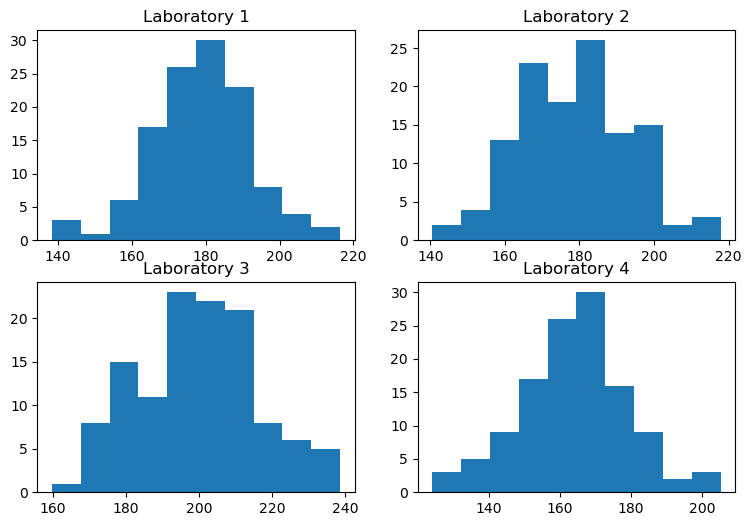

In [18]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(lab['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(lab['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(lab['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(lab['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

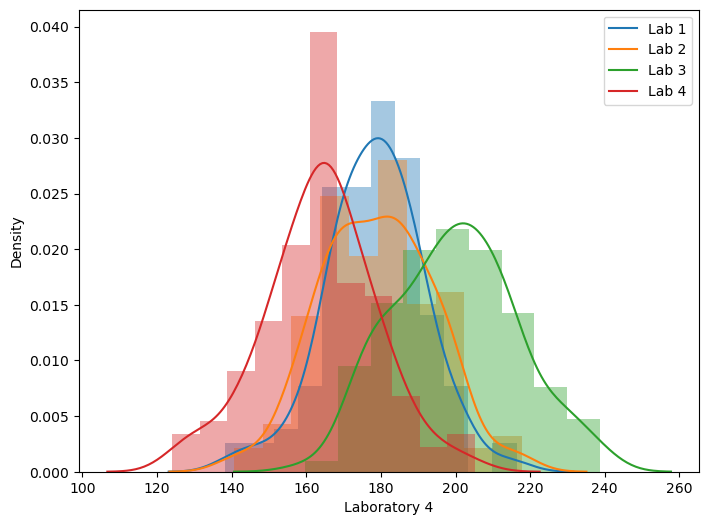

In [19]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sn.distplot(lab['Laboratory 1'], kde = True)
sn.distplot(lab['Laboratory 2'],hist = True)
sn.distplot(lab['Laboratory 3'],hist = True)
sn.distplot(lab['Laboratory 4'],hist = True)
plt.legend(labels)

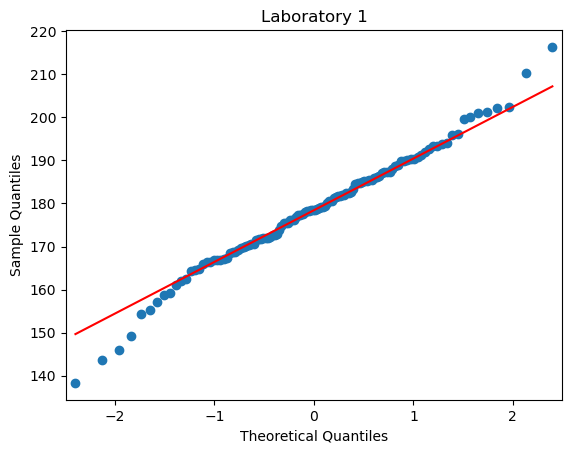

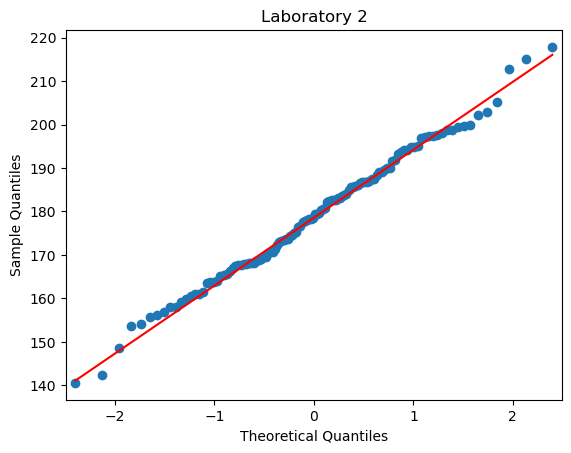

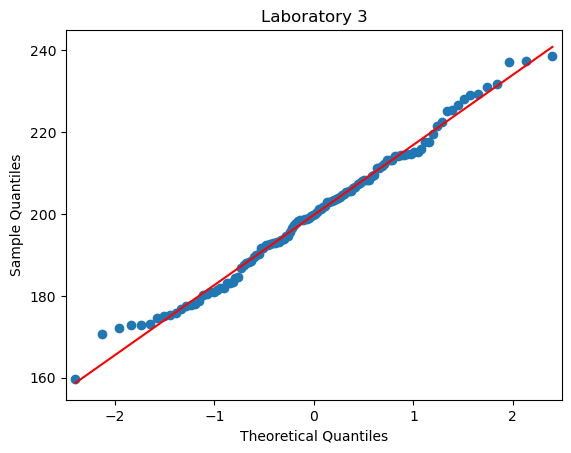

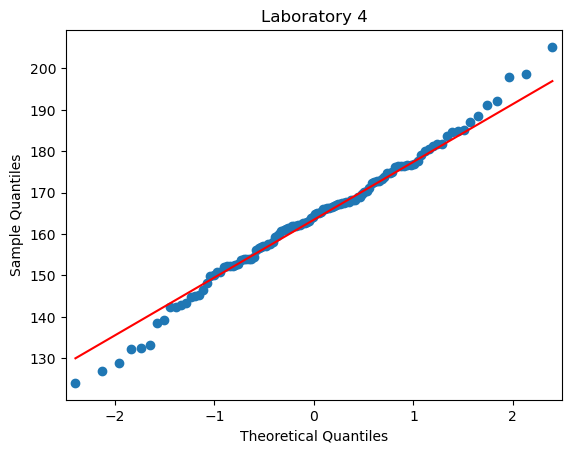

In [20]:
sm.qqplot(lab['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(lab['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(lab['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(lab['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()


In [21]:
# Compare Evidences with Hypothesis using t-statictic
test_statistic , p_value = st.f_oneway(lab.iloc[:,0],lab.iloc[:,1],lab.iloc[:,2],lab.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [22]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')


Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


## Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples

# Question 3

## Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions

## We are going to conduct a Test of Independence using Chi-Square  test with Contingency table.because its categorical data.
### We need to check whether the proportion of any of these samples are different or the same?

In [24]:
buyer=pd.read_csv("C:\\Users\\DELL\\Data Science\\Abhishek ExcelR\\Data Science\\Assignments\\Hypothesis Testing\\BuyerRatio.csv")

In [25]:
buyer


,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [27]:
#convert into array
table = [[50,142,131,70],
        [435,1523,1356,750]]

In [28]:
#Applying chi-square contingency test table to convert observed value into expected value
stat,p,dof,exp=st.chi2_contingency(table)
print(stat,"\n",p,"\n",dof,"\n",exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [31]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])



## Comparing Evidence with Hypothesis


In [41]:
#ddof(degree of freedom)is no. of values in final calculations of a statistic that are free to vary.
#it claculates ,subtract the no of relation from the no. observarions(4-1)

statistics,p_value=st.chisquare(observed,expected,ddof=3)
print("Statistics= ",statistics,"\n","P_Value",p_value)

Statistics=  1.5959455390914483 
 P_Value 0.8095206646905712


## Compare p_value with 'alpha'(Significane Level)
### If p_value is not equal to "alpha" we failed to reject Null Hypothesis because of lack of evidence
### If p_value is = 'alpha' we reject Null Hypothesis
### interpreting p-value

In [59]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between the values')
else:
    print('We accept Null hypothesis')

Significnace=0.050, p=0.425
We accept Null hypothesis


### We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

# Question 4

## TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


## We are going to conduct a Test of Independence using Chi-Square (X2) test with Contingency table(Defective ,error free )
### We need to check whether the mean of any of these samples are different or the same?

In [43]:
centers=pd.read_csv("C:\\Users\\DELL\\Data Science\\Abhishek ExcelR\\Data Science\\Assignments\\Hypothesis Testing\\Costomer+OrderForm.csv")

In [44]:
centers


,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [45]:
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [46]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [50]:
print(centers["Phillippines"].value_counts())
print("\n")
print(centers["Indonesia"].value_counts(),"\n")
print(centers["Malta"].value_counts(),"\n")
print(centers["India"].value_counts(),"\n")

Error Free    271
Defective      29
Name: Phillippines, dtype: int64


Error Free    267
Defective      33
Name: Indonesia, dtype: int64 

Error Free    269
Defective      31
Name: Malta, dtype: int64 

Error Free    280
Defective      20
Name: India, dtype: int64 



In [51]:
#Creating Table
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [52]:
#Calculating expected values for obs.data
stat,p,df,exp=st.chi2_contingency(contingency_table)
print("Statistics = ",st,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)


Statistics =  <module 'scipy.stats' from 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\scipy\\stats\\__init__.py'> 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [53]:
#Defining Expected values and observed values
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])


In [55]:
#Compare Evidences with Hypothesis using t-statictic
test_statistic , p_value = st.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)


Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [58]:
#Interpreting p_value
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between values')
else:
    print('We Accept Null hypothesis')


Significnace=0.050, p=0.425
We Accept Null hypothesis


# We fail to reject Null Hypothesis because of lack of evidence.